# 18.303 Homework 2 Notebook

This notebook accompanies Lecture 7 and Homework 2 posted on the [18.303 web page](https://github.com/mitmath/18303), and is here to help you start solving the Laplace and Poisson equations with finite differences.

Run the following code snippet to bring in the packages used in this notebook.

In [6]:
using LinearAlgebra
using SparseArrays
using Plots

## Poisson's equation

Let's start with Poisson's equation on the square with the homogeneous boundary conditions. We're looking for a function $u(x,y)$ that satisfies

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}   = 0, \qquad u(\pm 1, y)=u(x,\pm 1)=0.
$$

Following the Lecture 8 notes, we discretize by replacing $u(x,y)$ and $f(x,y)$ with $n\times n$ matrices of values sampled from an $n\times n$ equispaced computational grid, $(x_i,y_j)$ with $1\leq i,j\leq n$, on the interior of the unit square. If we replace the second derivatives with second-order centered difference approximations and apply the homogeneous boundary conditions at the boundary points, we get the $n\times n$ matrix equation

$$
DU + UD = F, \qquad \text{where} \qquad D = \frac{1}{h^2}\begin{pmatrix}
-2 & 1 & & & \\
  1 & -2 & 1 & & \\
   & \ddots  & \ddots & \ddots & \\
   & & 1 & -2 & 1 \\
    & & & 1 & -2
\end{pmatrix}
$$

where the entries of $(U)_{ij}$ are the unkowns on our computational grid and $(F)_{ij}=f(x_i,y_j)$ are samples of the right-hand side on the grid. We the turn this into an $n^2\times n^2$ linear system of equations by vectorizing both sides of the matrix equation and applying the Kronecker product identity on the left-hand side to get

$$
Av = b, \qquad \text{where} \qquad A =I\otimes D + D\otimes I, \quad v = {\rm vec}(U),  \quad\text{and}\quad b = {\rm vec}(F).
$$

The following code block constructs this linear system.

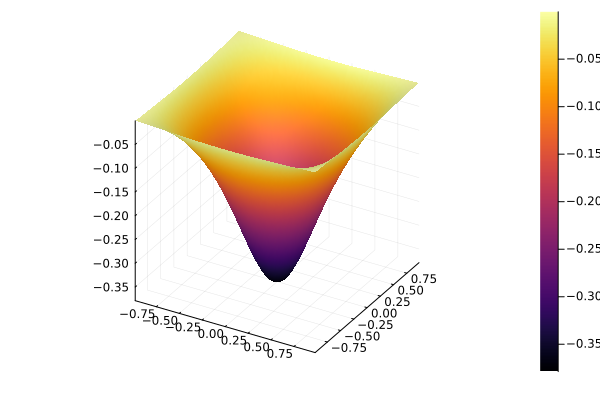

In [20]:
## build n x n 2nd central difference matrix
function cdiff2(n)
    h = 2 / (n+1)
    D = spdiagm(-1 => ones(n-1), 0 => -2*ones(n), 1 => ones(n-1))
    D = D / h^2
end

## build n^2 x n^2 discretization of Laplace operator with zero Dirichlet BCs
function lap(n)

    # sparse second difference matrix and identity
    D = cdiff2(n)
    spI = sparse(I,n,n)

    # Kronecker product
    A = kron(spI,D)+kron(D,spI)

end

# solve Poisson's equation with right-hand side f(x,y) and zero Dirichlet BCs
function poissonSolve(f, n)
    xfull = collect(LinRange(-1,1,n+2))
    xint = xfull[2:end-1]  
    b = vec(f(xint,xint'))          # vectorize f evaluated on grid for right-hand side
    A = lap(n)                      # get finite diff discretization of Laplacian
    u = reshape(A \ b, (n,n))       # reshape solution onto n x n grid
end

# solve Poisson's equation with Gaussian right-hand side
n = 100
f(x,y) = 5*exp.(-10*(x.^2 .+ y.^2))
u = poissonSolve(f, n)

# plot solution on grid (interior)
xfull = LinRange(-1,1,n+2)
xint = xfull[2:end-1]
surface(xint,xint,u)


Can you modify the above discretization process to incorporate non-homogeneous boundary conditions $u_{\partial\Omega}=g$?